# DTR with Boston Housing (Regression)
------------------------------------------------

In [1]:
# import modules we need for EDA and wrangling
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# these functions are useful for splitting and normalization
from sklearn.preprocessing import  MinMaxScaler
from sklearn.model_selection import train_test_split

# import other functions we'll need for regression modeling
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from six import StringIO

# regression error metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [2]:
# read in some data
df = pd.read_csv('Boston-house-price-data.csv')

In [27]:
df.shape

(506, 14)

In [28]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [29]:
df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

In [31]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [32]:
df.info() # gives you missing values report too

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


## Data splitting
Subset data into X features and Y target variable for modeling. Convert X and Y to numpy arrays. Then use train_test_split for data splitting (80/20 is very common)

In [37]:
# target variable
Y = df['MEDV']
print(Y.shape)

(506,)


In [38]:
# everything else is X 
X = df.drop('MEDV', axis=1)
print(X.shape) 

(506, 13)


In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, Y,
                                                    test_size = 0.2,
                                                    shuffle = True,
                                                    random_state = 42)

In [41]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(404, 13) (102, 13) (404,) (102,)


## Min/Max Scaling
This will ensure all of your X data is between 0 (min) and 1 (max). Use fit_transform() on the train data first, then fit on the test data. 

Only scale the X data, not the Y data!

In [42]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Fit The Model
Fit the model and make new variables to save your train and test predictions. 

### Linear Regression

In [43]:
# make a variable to store the general model
LR = LinearRegression()
# fit the model - one line of code
LR = LR.fit(X_train, y_train)

In [44]:
# store the predictions
train_preds_LR = LR.predict(X_train) 
test_preds_LR = LR.predict(X_test) 

### Decision Tree Regressor

In [45]:
DTR = DecisionTreeRegressor(min_samples_split=15)

DTR = DTR.fit(X_train, y_train)

In [46]:
# store the predictions
train_preds_DTR = DTR.predict(X_train) 
test_preds_DTR = DTR.predict(X_test) 

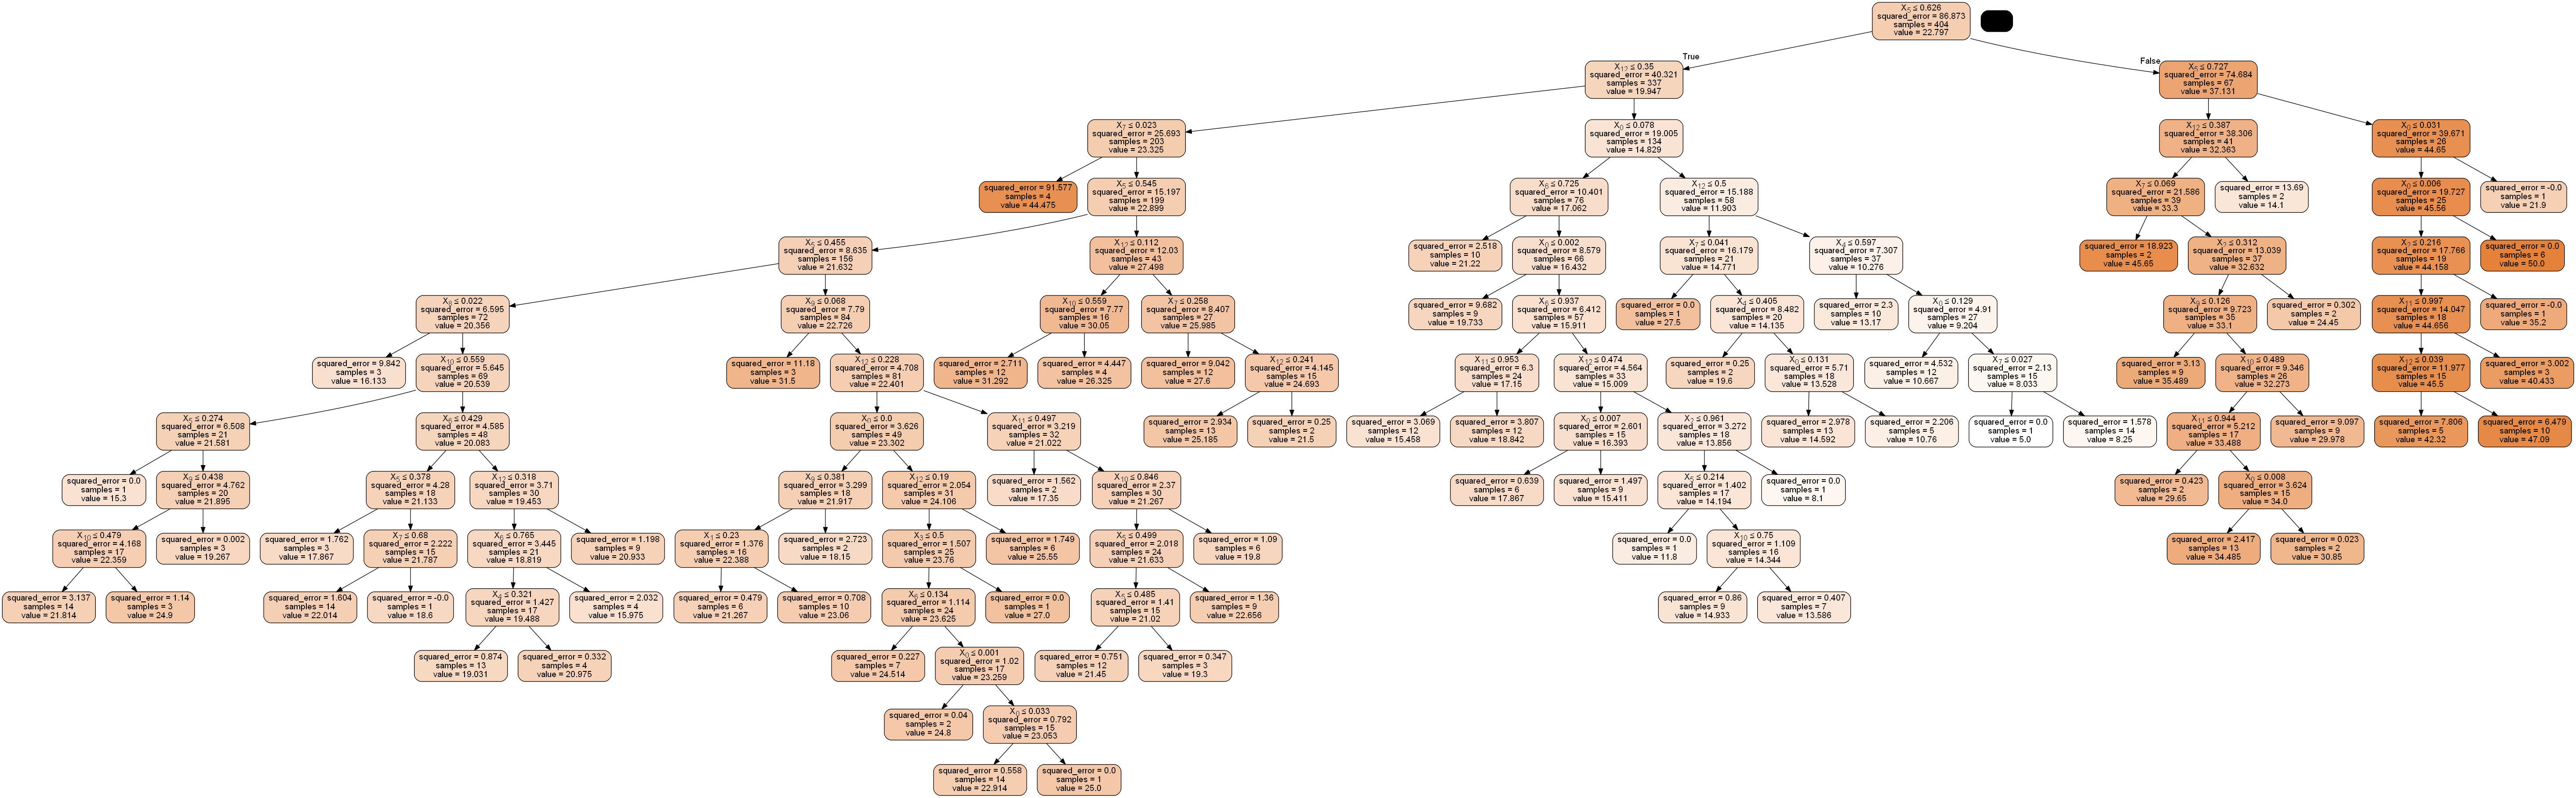

In [47]:
# show the tree
from sklearn.tree import export_graphviz 
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(DTR, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

## Evaluate the Model
Look at the appropriate error metrics depending on the problem you are solving. 

For a regression problem, look at the R2, MAE and MSE; then make a scatterplot of actual vs. predicted values with nice labels and titles.

For a classification problem, create the classification report (gives a confusion matrix and useful metrics in one line of code).

See how we are just tacking on a suffix like '_LR' or '_DTR' on the end of things? Keep your code clean and you can just copy paste. Same stuff as before, but we need to be organized since we are introducing more models.

### R2

In [48]:
# this is a regression problem, and there are three metrics to look at.
# 1) R2 value - for Linear Regression
print("This is train R2 (LR):", r2_score(y_train, train_preds_LR)) # train
print("This is test R2 (LR):", r2_score(y_test, test_preds_LR)) # test

# 1) R2 value - for Decision Tree Regression
print("This is train R2 (DTR):", r2_score(y_train, train_preds_DTR)) # train
print("This is test R2 (DTR):", r2_score(y_test, test_preds_DTR)) # test

This is train R2 (LR): 0.7508856358979673
This is test R2 (LR): 0.6687594935356318
This is train R2 (DTR): 0.9574231825076177
This is test R2 (DTR): 0.7398699006233229


### MAE

In [49]:
# 2) mae - for Linear Regression
trainMAE_LR = mean_absolute_error(y_train, train_preds_LR)
print("This is trainMAE (LR):", trainMAE_LR) # train
testMAE_LR = mean_absolute_error(y_test, test_preds_LR)
print("This is testMAE (LR):", testMAE_LR) # test

# 2) mae - for DT Regression
trainMAE_DTR = mean_absolute_error(y_train, train_preds_DTR)
print("This is trainMAE (DTR):", trainMAE_DTR) # train
testMAE_DTR = mean_absolute_error(y_test, test_preds_DTR)
print("This is testMAE (DTR):", testMAE_DTR) # test

This is trainMAE (LR): 3.314771626783231
This is testMAE (LR): 3.1890919658878483
This is trainMAE (DTR): 1.3023692561563849
This is testMAE (DTR): 2.710667839785487


### MSE
If you see an MSE of 0, this means a perfect prediction - this should NEVER happen... there should always be at least a little bit of error in your train results, otherwise you are OVERFITTING. 

In [50]:
# 3) mse
trainMSE_LR = mean_squared_error(y_train, train_preds_LR)
print("This is trainMSE (LR):", trainMSE_LR)
testMSE_LR = mean_squared_error(y_test, test_preds_LR)
print("This is testMSE (LR):", testMSE_LR)

# 3) mse
trainMSE_DTR = mean_squared_error(y_train, train_preds_DTR)
print("This is trainMSE (DTR):", trainMSE_DTR)
testMSE_DTR = mean_squared_error(y_test, test_preds_DTR)
print("This is testMSE (DTR):", testMSE_DTR)

This is trainMSE (LR): 21.641412753226312
This is testMSE (LR): 24.29111947497353
This is trainMSE (DTR): 3.6987930599378616
This is testMSE (DTR): 19.076324301162504


## LR predictions
This is a simpler model, and it has different error than the Decision Tree model!

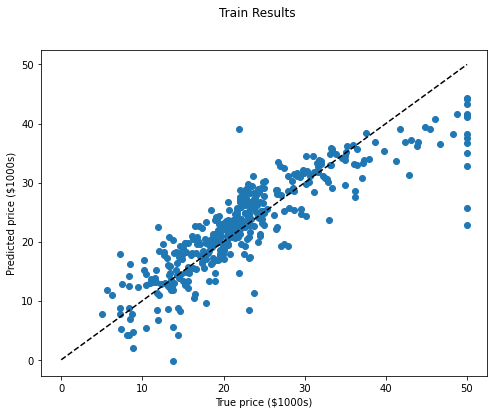

In [51]:
# a quick scatterplot for train results
# let's see how it fit
plt.figure(figsize=(8, 6))
plt.scatter(x=y_train, y=train_preds_LR)
plt.plot([0, 50], [0, 50], '--k') # 45 degree line
plt.axis('tight')
plt.xlabel('True price ($1000s)')
plt.ylabel('Predicted price ($1000s)')
plt.suptitle('Train Results')
plt.show()

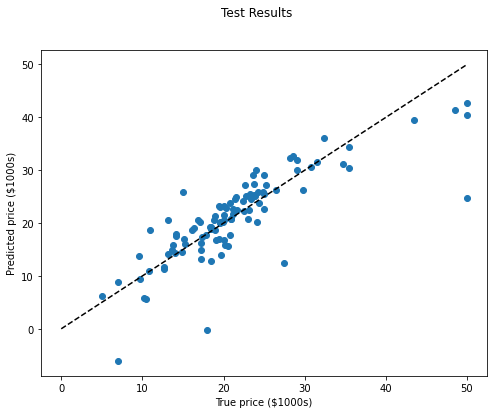

In [52]:
# a quick scatterplot for test results
# same code as above, just different labels
# a quick scatterplot for train results
# let's see how it fit
plt.figure(figsize=(8, 6))
plt.scatter(x=y_test, y=test_preds_LR)
plt.plot([0, 50], [0, 50], '--k') # 45 degree line
plt.axis('tight')
plt.xlabel('True price ($1000s)')
plt.ylabel('Predicted price ($1000s)')
plt.suptitle('Test Results')
plt.show()

## DTR Results
Look at how each has a different flavor...

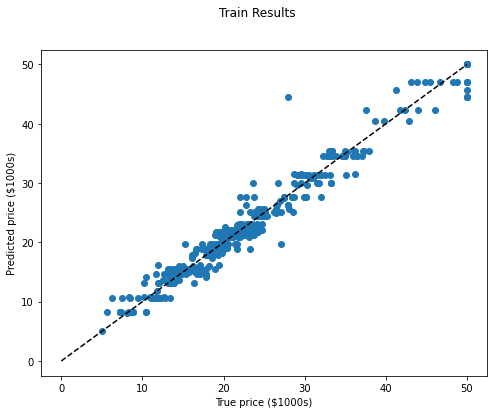

In [53]:
# a quick scatterplot for train results
# let's see how it fit
plt.figure(figsize=(8, 6))
plt.scatter(x=y_train, y=train_preds_DTR)
plt.plot([0, 50], [0, 50], '--k') # 45 degree line
plt.axis('tight')
plt.xlabel('True price ($1000s)')
plt.ylabel('Predicted price ($1000s)')
plt.suptitle('Train Results')
plt.show()

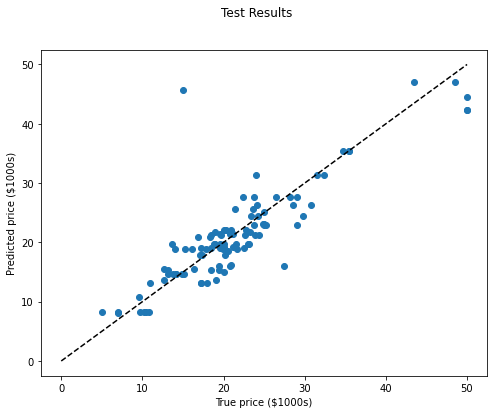

In [54]:
# a quick scatterplot for test results
# same code as above, just different labels
# a quick scatterplot for train results
# let's see how it fit
plt.figure(figsize=(8, 6))
plt.scatter(x=y_test, y=test_preds_DTR)
plt.plot([0, 50], [0, 50], '--k') # 45 degree line
plt.axis('tight')
plt.xlabel('True price ($1000s)')
plt.ylabel('Predicted price ($1000s)')
plt.suptitle('Test Results')
plt.show()

## Sub-Plots

### LR Results

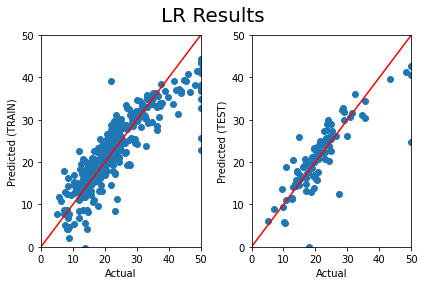

In [55]:
# specify the dimensions 
fig, axes = plt.subplots(1,2) # 1 row, 2 columns

# fig limits


# add a main title across top
fig.suptitle("LR Results", fontsize=20)

# this makes the individual subplots
axes[0].scatter(x=y_train, y=train_preds_LR) #first row, first entry (left top)
axes[0].set_xlabel("Actual", fontsize=10)
axes[0].set_ylabel("Predicted (TRAIN)",  fontsize=10)
# set plot limits
axes[0].set_xlim(0,50)
axes[0].set_ylim(0,50)
# add 45 degree line to left panel
x = np.linspace(*axes[0].get_xlim())
axes[0].plot(x, x, color='red')


axes[1].scatter(x=y_test, y=test_preds_LR) # first row, second entry (right top)
axes[1].set_xlabel("Actual", fontsize=10)
axes[1].set_ylabel("Predicted (TEST)",  fontsize=10)
# set plot limits
axes[1].set_xlim(0,50)
axes[1].set_ylim(0,50)
# add 45 degree line to right panel
x = np.linspace(*axes[1].get_xlim())
axes[1].plot(x, x, color='red')

# tight layout
fig.tight_layout()

# scooch it down
# link: https://stackoverflow.com/questions/7066121/how-to-set-a-single-main-title-above-all-the-subplots-with-pyplot
fig.subplots_adjust(top=0.88)

# show the plot
plt.show()

### DTR Results

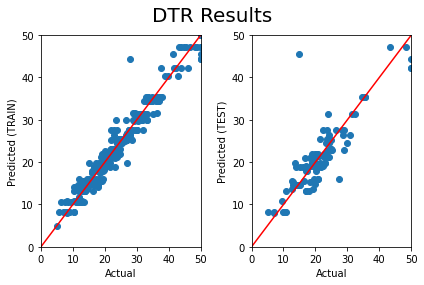

In [56]:
# specify the dimensions 
fig, axes = plt.subplots(1,2) # 1 row, 2 columns

# fig limits


# add a main title across top
fig.suptitle("DTR Results", fontsize=20)

# this makes the individual subplots
axes[0].scatter(x=y_train, y=train_preds_DTR) #first row, first entry (left top)
axes[0].set_xlabel("Actual", fontsize=10)
axes[0].set_ylabel("Predicted (TRAIN)",  fontsize=10)
# set plot limits
axes[0].set_xlim(0,50)
axes[0].set_ylim(0,50)
# add 45 degree line to left panel
x = np.linspace(*axes[0].get_xlim())
axes[0].plot(x, x, color='red')


axes[1].scatter(x=y_test, y=test_preds_DTR) # first row, second entry (right top)
axes[1].set_xlabel("Actual", fontsize=10)
axes[1].set_ylabel("Predicted (TEST)",  fontsize=10)
# set plot limits
axes[1].set_xlim(0,50)
axes[1].set_ylim(0,50)
# add 45 degree line to right panel
x = np.linspace(*axes[1].get_xlim())
axes[1].plot(x, x, color='red')

# tight layout
fig.tight_layout()

# scooch it down
# link: https://stackoverflow.com/questions/7066121/how-to-set-a-single-main-title-above-all-the-subplots-with-pyplot
fig.subplots_adjust(top=0.88)

# show the plot
plt.show()

# Done!
The DTR model overfits the training data a little bit, but we will let that be for now. If you want, try updating some of the hyperparameters so that you get a little more scatter along the 45 degree line. For a DTR, you may consider


*   min_samples_leaf
*   min_samples_split

For example, by making min_samples_leaf = 15, you force the terminal nodes/leafs to have 15 rows in them, instead of 1! This is much more robust.

